<a href="https://colab.research.google.com/github/lorenzo-arcioni/BioSwiftAnalytics/blob/main/notebooks/MultiVenn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Venn Overlap Explorer: A Jupyter Notebook for Comparing Annotation Results Across Databases Using Venn Diagrams

Venn diagrams are a powerful visualization tool used in many areas of research, including bioinformatics. They are typically used to show the overlap between different sets or categories of data. In the context of omics data analysis, Venn diagrams can help identify common or unique hits across multiple databases or analyses, providing insights into the relationships between different datasets. In addition to the traditional Venn diagram, there are also variations such as Euler diagrams and Edwards-Venn diagrams, which can provide different types of visual representations of the data.

This notebook is able to interpret tab-separated value (TSV) files resulting from annotation software (BLAST/Diamond) and allows the generation of a Venn diagram that visualize the distribution of hits across different databases. This allows biologists or bioinformaticians to verify the common hits among databases and how the matches are distributed.

It is necessary to have the information regarding the ID of each sequence present in the tabular file (**qseqid**).

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted 
from matplotlib_venn import venn2_unweighted

In this section, it is possible to insert, by modifying the variables, information about the results.

So before you run this cell, follow the instructions in the comments.

In [2]:
# Insert the names (or paths) of the tsv files (remember to follow the order of the database names)
files = [
    "../data/" + "culex_pipiens-longest_orf-blastp-nr.tsv",
    "../data/" + "culex_pipiens-longest_orf-blastp-tr.tsv",
    "../data/" + "culex_pipiens-longest_orf-blastp-sp.tsv"   
]

# Insert the titles of the graph
title = "Culex pipiens blastp"

# Insert the databases names (remember to follow the order of the files)
database_names =[
    "Nr", 
    "TrEMBL",
    "Swiss-Prot",
]

# Insert the path of the graphs
path = "../results/" + title.lower().replace(" ", "_")

#Creating a dictonary list where each dict contains all sequences hits count
sets_list = []

# Set the outformat
# e.g. 
# outfmt = "qseqid qlen sseqid sallseqid slen qstart qend sstart send qseq full_qseq sseq full_sseq evalue bitscore score length pident nident mismatch positive gapopen gaps ppos qframe btop cigar staxids sscinames sskingdoms skingdoms sphylums stitle salltitles qcovhsp scovhsp qtitle qqual full_qqual qstrand"
# If there are column names in the file then set outfmt = None
outfmt = "qseqid qlen sseqid slen evalue bitscore score length pident stitle"

# Save the venn diagram also as a tsv file
save_data = False

# Set the index of the target feature (must be not None)
index = 'qseqid'

# Create the venn diagram list 
for f in files:

    #Import the dataset
    if outfmt != None:
        df = pd.read_csv(f, sep="\t", names=outfmt.split())
    else:
        df = pd.read_csv(f, sep="\t")
    
    #Drop Nan rows
    df.dropna(subset=[index], inplace=True)

    # Get just the first hit of each sequence
    df = df.groupby('qseqid').first().reset_index()
    
    #Create and append the dict
    sets_list.append(set(df[index]) - {index})

    del df

# Create the dataframe
df = pd.DataFrame(columns=['id', 'db'])

# for each set in the list
for s in range(len(sets_list)):

    # Create the temporary dataframe
    tmp = pd.DataFrame({
        'id': [x for x in sets_list[s]],
        'db': [database_names[s] for _ in range(len(sets_list[s]))]
    })

    # Append the temporary dataframe to the main dataframe
    df = pd.concat([df, tmp], axis=0)


And now plot!

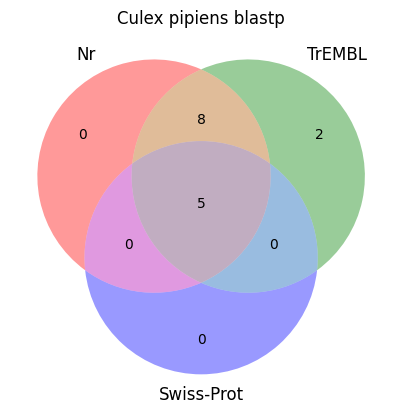

In [3]:
# Create the venn diagram
if len(files) == 2:
    venn2_unweighted(sets_list, database_names)
elif len(files) == 3:
    venn3_unweighted(sets_list, database_names)
else:
    print("This notebook only supports 2 or 3 dimensional venn diagram")

plt.title(title)

#Saving the venn diagram
if save_data:
    df.to_csv(path + '_venn_results.tsv', sep='\t')
plt.savefig(path + '_venn_results.png', bbox_inches = 'tight', dpi=350)
plt.show()